## Importing libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset
import torch.nn.functional as F

from sklearn.preprocessing import StandardScaler   
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from collections import Counter

from mpl_toolkits.mplot3d import axes3d


In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Importing the Dataset

In [57]:
# Adding column names
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
# Importing the dataset
df = pd.read_csv('magic04.data',names = col_names)
#df = df.sample(frac = 1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [58]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


g    12332
h     6688
Name: class, dtype: int64


<AxesSubplot: xlabel='class', ylabel='count'>

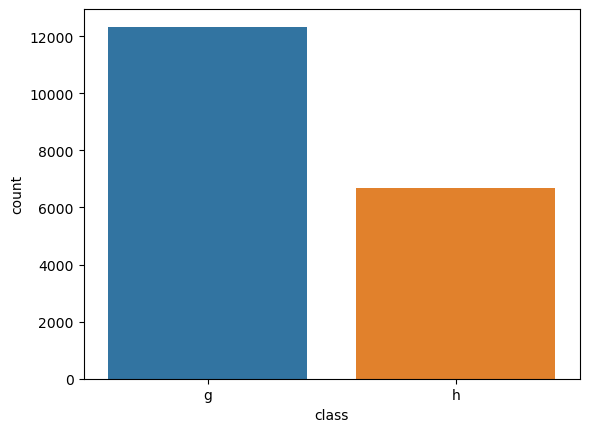

In [59]:
print(df['class'].value_counts())
sns.countplot(x = 'class', data=df)

## Data Balancing

In [60]:
# Splitting dataset  by class label
df_g = df[df['class'] == 'g']
df_h = df[df['class'] == 'h']
df_g

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,g
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,g
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,g
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,g


g    6688
h    6688
Name: class, dtype: int64


<AxesSubplot: xlabel='class', ylabel='count'>

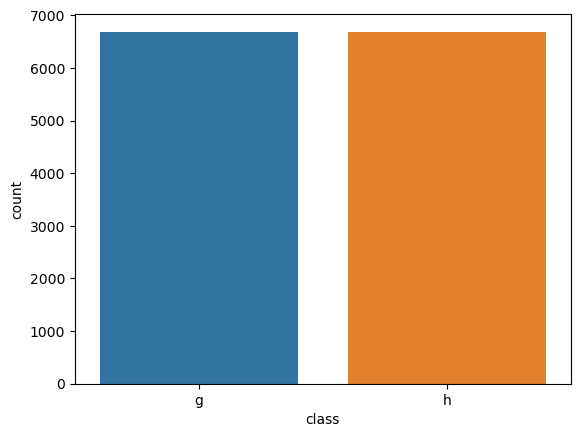

In [61]:
# Balancing Data
#dfbalanced_g = df_g.sample(df_h.shape[0])
dfbalanced_g = df_g[:df_h.shape[0]]
df = pd.concat([dfbalanced_g, df_h], axis=0) # concatenate horizontally
print(df['class'].value_counts())
sns.countplot(x = 'class', data=df)

In [62]:
# Separating features and class
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

## Encoding Class Labels

In [63]:
# Encoding the Dependent Variable(y)
le= LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


## Splitting Dataset into train set and test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2999, random_state = 0,stratify=y)
print(f"Train set size: {X_train.shape[0]}\nTest set size: {X_test.shape[0]}")
print(Counter(y_train))
print(Counter(y_test))

Train set size: 9364
Test set size: 4012
Counter({1: 4682, 0: 4682})
Counter({0: 2006, 1: 2006})


## Feature Scaling

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.80003316, -0.52172403, -0.96415184, ...,  0.34172681,
         0.88934769, -0.35479185],
       [-0.33172252, -0.57364175, -0.4138196 , ..., -0.31172628,
         1.70106983,  0.49487069],
       [ 0.20249025,  0.09986019,  1.14279238, ...,  0.48458488,
        -1.04672703, -0.3034972 ],
       ...,
       [-0.83631728, -0.64940233, -0.94733496, ..., -0.29880401,
         0.79056201,  0.31416604],
       [-0.4899425 , -0.42189861, -0.79451161, ..., -0.58252877,
         1.82963784, -1.62657799],
       [-0.76706189, -0.80618331, -1.68160176, ..., -0.28070761,
        -0.32199777, -0.71243169]])

## Building the neural network

In [66]:
def load_data(X_train,y_train,X_test,y_test,batch_size):
    # define the data as a PyTorch tensor
    X_train_tensor=torch.from_numpy(X_train).float()
    y_train_tensor=torch.from_numpy(y_train).float()
    X_test_tensor=torch.from_numpy(X_test).float()
    y_test_tensor=torch.from_numpy(y_test).float()
    # To use the batches of the dataset we are required to put the data through the Dataloader module of PyTorch
    train_loader = DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size,shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size,shuffle=True)
    #train_data = Dataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    #test_data = Dataset(torch.FloatTensor(X_test))
    return train_loader, test_loader

In [67]:
def get_accuracy(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)

    correct_results_sum = (y_pred_tag == y_test).sum()
    acc = correct_results_sum/y_test.shape[0]
    #acc = torch.round(acc * 100)
    
    return acc

In [68]:
def evaluate(test_loader, network):
    network.eval()
    correct = 0
    loss = 0
    total = 0
    current_loss = 0 
    with torch.no_grad():
        for X_batch,y_batch in test_loader:
            y_pred = network(X_batch)
            loss = F.binary_cross_entropy(y_pred,y_batch.unsqueeze(1)).item()
            current_loss = (current_loss + loss)/2
            for index, i in enumerate(y_pred):
                i = 1 if i >= 0.5 else 0
                if  i == y_batch[index]:
                    correct += 1
                total += 1
    return round(correct/total,3), round(current_loss,3)


In [75]:
def train(train_loader, network, optimizer, criterion, batch_size,epochs = 30):
    network.train()
    for epoch in range(1,epochs+1):
        for X_batch,y_batch in train_loader:
            X_batch, y_batch = X_batch, y_batch
            optimizer.zero_grad()
            # forward propagation
            y_pred = network(X_batch)
            # compute loss
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = get_accuracy(y_pred, y_batch.unsqueeze(1))
            # backward propagation
            loss.backward()
            # update parameters
            optimizer.step()
        #print(f'Epoch {epoch}: | Loss: {loss:.3f} | Accuracy: {acc:.3f}')

In [70]:
class NeuralNet(nn.Module):
    def __init__(self,l1, l2, input_size = 10):
        super().__init__()
        self.hidden1 = nn.Linear(input_size, l1) 
        self.hidden2 = nn.Linear(l1, l2)
        self.output_layer = nn.Linear(l2, 1) 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, inputs):
        activation1 = self.relu(self.hidden1(inputs))
        activation2 = self.relu(self.hidden2(activation1))
        output = self.sigmoid(self.output_layer(activation2))
        
        return output

In [71]:
def reset_weights(m):
    # to avoid weight leakage
    if isinstance(m, nn.Linear):
        m.reset_parameters()

## Hyperparameter tuning using cross validation

In [85]:
EPOCHS = 30
BATCH_SIZE = 100
LEARNING_RATE = 0.001
def cross_validation(X_train,y_train,l1_nodes, l2_nodes, lr = LEARNING_RATE, epochs = EPOCHS, batch_size = BATCH_SIZE,cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True)
    network = NeuralNet(l1_nodes,l2_nodes)
    #network = network.to(device)
    optimizer = optim.Adam(network.parameters(),lr = lr)
    criterion= nn.BCELoss()
    avg_accuracy = 0
    fold = 1
    for train_index, test_index in skf.split(X_train, y_train):
        train_loader_folds, test_loader_fold = load_data(X_train[train_index],y_train[train_index],X_train[test_index],y_train[test_index],batch_size=batch_size)
        network.apply(reset_weights)
        print(f"Fold {fold} / {cv}:")
        print("------------------------------------------------------------------------------------")
        train(train_loader_folds, network,optimizer,criterion,batch_size, epochs = epochs)
        accuracy, loss = evaluate(test_loader_fold, network)
        avg_accuracy = (avg_accuracy + accuracy) / 2
        fold += 1
        print(f"Accuracy = {accuracy}, Loss = {loss}")
        print("------------------------------------------------------------------------------------")
    return avg_accuracy


In [86]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, acc={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


## Tuning the hidden nodes in each layer
```l1```: hidden nodes in first layer

```l2```: hidden nodes in second layer

In [91]:
l1 = np.arange(10,100,10)
l2 = np.arange(10,100,10)
l_combination = []
avg_accuracies = []
for n in l1:
    for m in l2:
        l_combination.append((n,m))
        acc_score = cross_validation(X_train,y_train,n,m,lr=0.01,epochs = 25,batch_size = 128,cv=10)
        print(f"============================= l1 = {n}, l2 = {m}, average accuracy = {round(acc_score,3)} ============================= ")
        avg_accuracies.append(acc_score)
        

Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.827, Loss = 0.339
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.842, Loss = 0.343
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.852, Loss = 0.351
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.835, Loss = 0.319
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.849, Loss = 0.351
---------------

Accuracy = 0.823, Loss = 0.423
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.853, Loss = 0.302
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.832, Loss = 0.39
------------------------------------------------------------------------------------
============================= l1 = 10, l2 = 40, average accuracy = 0.838 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.842, Loss = 0.351
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.841, Loss = 0.371
---------

Accuracy = 0.85, Loss = 0.389
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.843, Loss = 0.3
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.864, Loss = 0.338
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.377
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.398
------------------------------------------------------------------------------------
Fold 10 / 10:
-----------------

Accuracy = 0.828, Loss = 0.332
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.829, Loss = 0.332
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.863, Loss = 0.291
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.828, Loss = 0.313
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.38
------------------------------------------------------------------------------------
Fold 7 / 10:
----------------

Accuracy = 0.826, Loss = 0.413
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.849, Loss = 0.369
------------------------------------------------------------------------------------
============================= l1 = 20, l2 = 60, average accuracy = 0.843 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.86, Loss = 0.285
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.844, Loss = 0.358
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.276
---------

Accuracy = 0.839, Loss = 0.341
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.843, Loss = 0.294
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.865, Loss = 0.266
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.843, Loss = 0.304
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.862, Loss = 0.351
------------------------------------------------------------------------------------
===========================

Accuracy = 0.842, Loss = 0.329
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.856, Loss = 0.329
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.842, Loss = 0.458
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.828, Loss = 0.371
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.854, Loss = 0.3
------------------------------------------------------------------------------------
Fold 8 / 10:
-----------------

Accuracy = 0.863, Loss = 0.251
------------------------------------------------------------------------------------
============================= l1 = 30, l2 = 80, average accuracy = 0.852 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.836, Loss = 0.341
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.825, Loss = 0.405
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.869, Loss = 0.488
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.837, Loss = 0.331
---------

Accuracy = 0.866, Loss = 0.279
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.83, Loss = 0.326
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.841, Loss = 0.411
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.386
------------------------------------------------------------------------------------
============================= l1 = 40, l2 = 30, average accuracy = 0.839 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.853, Loss = 0.248
---------

Accuracy = 0.841, Loss = 0.391
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.83, Loss = 0.44
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.826, Loss = 0.48
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.861, Loss = 0.335
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.84, Loss = 0.326
------------------------------------------------------------------------------------
Fold 9 / 10:
-------------------

Accuracy = 0.851, Loss = 0.396
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.851, Loss = 0.331
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.858, Loss = 0.274
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.847, Loss = 0.426
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.834, Loss = 0.351
------------------------------------------------------------------------------------
Fold 6 / 10:
---------------

Accuracy = 0.872, Loss = 0.366
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.84, Loss = 0.342
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.449
------------------------------------------------------------------------------------
============================= l1 = 50, l2 = 50, average accuracy = 0.844 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.818, Loss = 0.316
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.835, Loss = 0.278
---------

Accuracy = 0.844, Loss = 0.285
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.857, Loss = 0.423
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.837, Loss = 0.317
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.865, Loss = 0.352
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.866, Loss = 0.281
------------------------------------------------------------------------------------
Fold 10 / 10:
--------------

Accuracy = 0.847, Loss = 0.315
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.374
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.832, Loss = 0.326
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.851, Loss = 0.305
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.858, Loss = 0.37
------------------------------------------------------------------------------------
Fold 7 / 10:
----------------

Accuracy = 0.843, Loss = 0.387
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.828, Loss = 0.314
------------------------------------------------------------------------------------
============================= l1 = 60, l2 = 70, average accuracy = 0.836 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.862, Loss = 0.414
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.829, Loss = 0.331
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.855, Loss = 0.304
--------

Accuracy = 0.85, Loss = 0.33
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.854, Loss = 0.262
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.856, Loss = 0.336
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.868, Loss = 0.383
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.351
------------------------------------------------------------------------------------
=============================

Accuracy = 0.84, Loss = 0.345
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.846, Loss = 0.293
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.851, Loss = 0.276
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.821, Loss = 0.345
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.85, Loss = 0.388
------------------------------------------------------------------------------------
Fold 8 / 10:
-----------------

Accuracy = 0.853, Loss = 0.448
------------------------------------------------------------------------------------
============================= l1 = 70, l2 = 90, average accuracy = 0.85 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.841, Loss = 0.338
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.848, Loss = 0.34
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.847, Loss = 0.419
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.845, Loss = 0.349
-----------

Accuracy = 0.86, Loss = 0.279
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.841, Loss = 0.351
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.86, Loss = 0.32
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.357
------------------------------------------------------------------------------------
============================= l1 = 80, l2 = 40, average accuracy = 0.845 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.864, Loss = 0.255
-----------

Accuracy = 0.842, Loss = 0.412
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.851, Loss = 0.329
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.827, Loss = 0.388
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.859, Loss = 0.291
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.838, Loss = 0.461
------------------------------------------------------------------------------------
Fold 9 / 10:
---------------

Accuracy = 0.857, Loss = 0.295
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.84, Loss = 0.322
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.852, Loss = 0.338
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.845, Loss = 0.302
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.86, Loss = 0.409
------------------------------------------------------------------------------------
Fold 6 / 10:
-----------------

Accuracy = 0.834, Loss = 0.533
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.85, Loss = 0.379
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.85, Loss = 0.447
------------------------------------------------------------------------------------
============================= l1 = 90, l2 = 60, average accuracy = 0.847 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.842, Loss = 0.393
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.859, Loss = 0.282
----------

In [92]:
max_accuracy = max(avg_accuracies)
max_index = avg_accuracies.index(max_accuracy)
print(f" maximum accuracy = {max_accuracy}\thidden nodes in layer1 = {l_combination[max_index][0]}\thidden nodes in layer2 = {l_combination[max_index][1]}")

 maximum accuracy = 0.8603095703124999	hidden nodes in layer1 = 80	hidden nodes in layer2 = 10


In [93]:
def plot(ax1, ax2, ax3):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')

    # Plot a basic wireframe.
    ax.plot_surface(ax1, ax2, ax3, cmap = 'seismic')
    ax.set_xlabel('hidden nodes in layer 1')
    ax.set_ylabel('hidden nodes in layer 2')
    ax.set_zlabel('accuracy')

    plt.show()

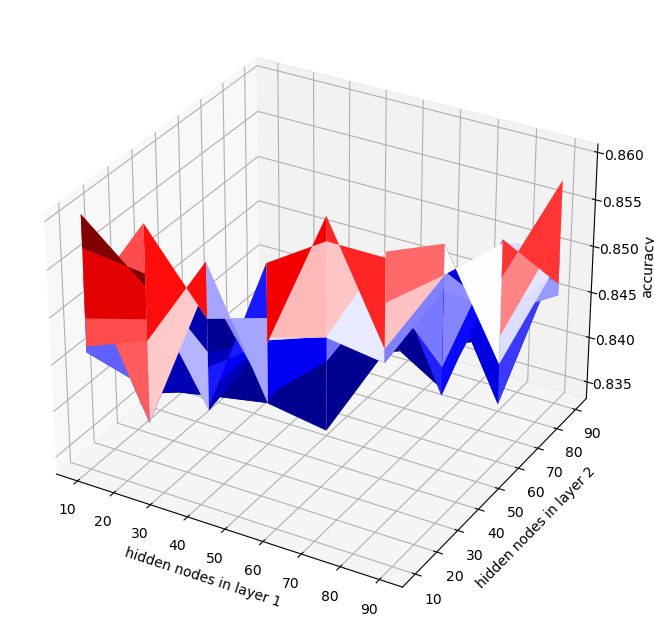

In [95]:
l1 = np.arange(10,100,10)
l2 = np.arange(10,100,10)
z = np.array(avg_accuracies).reshape(l1.shape[0], -1)
plot(l1, l2, z)

Final values after tuning:
    
```l1```: 80 nodes
```l2```: 10 nodes

## Tuning  ```learning_rate``` hyperparameter

In [96]:
learning_rates = [0.0001,0.001,0.01,0.1,1]
l1 = 80
l2 = 10
avg_accuracies = []
for l in learning_rates:
        acc_score = cross_validation(X_train,y_train,l1,l2,lr=l,epochs = 30 ,batch_size = 128,cv=10)
        print(f"============================= learning_rate = {l}, average accuracy = {round(acc_score,3)} ============================= ")
        avg_accuracies.append(acc_score)
        

Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.812, Loss = 0.426
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.83, Loss = 0.377
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.808, Loss = 0.355
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.792, Loss = 0.392
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.821, Loss = 0.417
----------------

Accuracy = 0.5, Loss = 0.691
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.5, Loss = 0.69
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.5, Loss = 0.691
------------------------------------------------------------------------------------
============================= learning_rate = 0.1, average accuracy = 0.5 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.501, Loss = 47.667
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.501, Loss = 51.572
------------

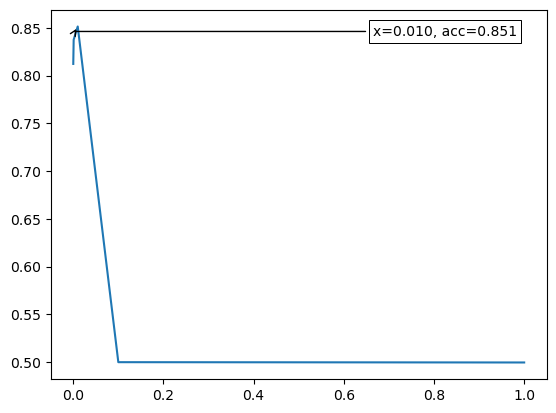

In [97]:
plt.plot(learning_rates,np.array(avg_accuracies))
annot_max(learning_rates,np.array(avg_accuracies))
plt.show()

## Tuning ```batch_size``` hyperparameter

In [99]:
lr= 0.01
l1 = 80 
l2 = 10
batch_size = [16,32,64,128,256,512]
avg_accuracies = []
for b in batch_size:
        acc_score = cross_validation(X_train,y_train,l1,l2,lr=lr,epochs = 30,batch_size = b,cv=10)
        print(f"============================= batch_size = {b}, average accuracy = {round(acc_score,3)} ============================= ")
        avg_accuracies.append(acc_score)
        

Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.856, Loss = 0.264
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.274
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.84, Loss = 0.396
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.848, Loss = 0.321
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.822, Loss = 0.428
----------------

Accuracy = 0.845, Loss = 0.474
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.399
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.854, Loss = 0.291
------------------------------------------------------------------------------------
============================= batch_size = 128, average accuracy = 0.848 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.867, Loss = 0.288
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.852, Loss = 0.303
--------

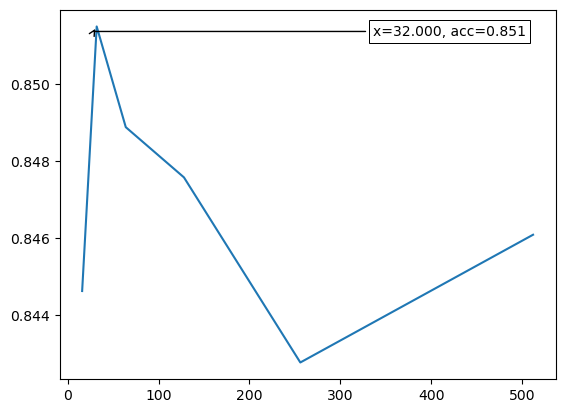

In [100]:
plt.plot(batch_size,np.array(avg_accuracies))
annot_max(batch_size,np.array(avg_accuracies))
plt.show()

## Tuning ```epoch``` hyperparameter

In [101]:
lr= 0.01
l1 = 80
l2 = 10
batch_size = 32
epochs = np.arange(20,51,10)
avg_accuracies = []
for epoch in epochs:
        acc_score = cross_validation(X_train,y_train,l1,l2,lr=lr,epochs = epoch,batch_size = batch_size,cv=10)
        print(f"============================= epochs = {epoch}, average accuracy = {round(acc_score,3)} ============================= ")
        avg_accuracies.append(acc_score)
        

Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.83, Loss = 0.61
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.852, Loss = 0.331
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.847, Loss = 0.243
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.848, Loss = 0.269
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 0.386
-----------------

Accuracy = 0.843, Loss = 0.44
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.847, Loss = 0.313
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.843, Loss = 0.735
------------------------------------------------------------------------------------
============================= epochs = 50, average accuracy = 0.843 ============================= 


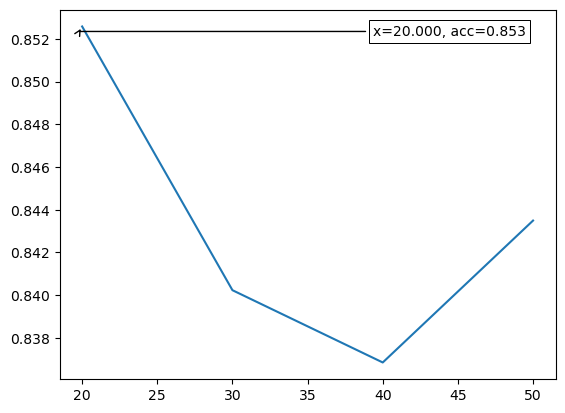

In [102]:
plt.plot(epochs,np.array(avg_accuracies))
annot_max(epochs,np.array(avg_accuracies))
plt.show()

In [103]:
lr= 0.01
l1 = 80
l2 = 10
batch_size = 32
epochs = np.arange(20,30,1)
avg_accuracies = []
for epoch in epochs:
        acc_score = cross_validation(X_train,y_train,l1,l2,lr=lr,epochs = epoch,batch_size = batch_size,cv=10)
        print(f"============================= epochs = {epoch}, average accuracy = {round(acc_score,3)} ============================= ")
        avg_accuracies.append(acc_score)
        

Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.848, Loss = 0.404
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.831, Loss = 0.49
------------------------------------------------------------------------------------
Fold 3 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.863, Loss = 0.279
------------------------------------------------------------------------------------
Fold 4 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.877, Loss = 0.404
------------------------------------------------------------------------------------
Fold 5 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.844, Loss = 0.355
----------------

Accuracy = 0.83, Loss = 0.216
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.878, Loss = 0.309
------------------------------------------------------------------------------------
Fold 10 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.83, Loss = 0.451
------------------------------------------------------------------------------------
============================= epochs = 23, average accuracy = 0.843 ============================= 
Fold 1 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.841, Loss = 5.97
------------------------------------------------------------------------------------
Fold 2 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.84, Loss = 0.286
-----------------

Accuracy = 0.849, Loss = 0.412
------------------------------------------------------------------------------------
Fold 6 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.855, Loss = 0.307
------------------------------------------------------------------------------------
Fold 7 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.854, Loss = 0.388
------------------------------------------------------------------------------------
Fold 8 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.839, Loss = 1.311
------------------------------------------------------------------------------------
Fold 9 / 10:
------------------------------------------------------------------------------------
Accuracy = 0.868, Loss = 0.408
------------------------------------------------------------------------------------
Fold 10 / 10:
--------------

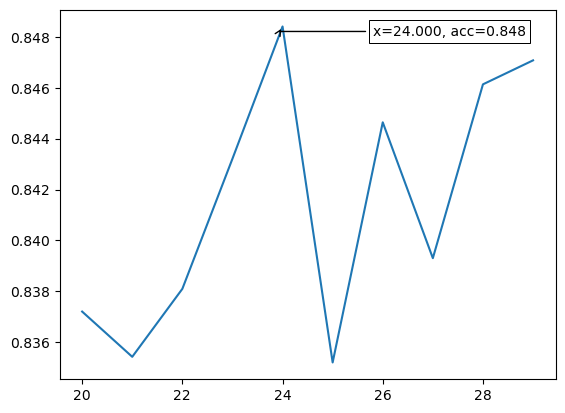

In [104]:
plt.plot(epochs,np.array(avg_accuracies))
annot_max(epochs,np.array(avg_accuracies))
plt.show()

## Hyperparameter tuning results:
hidden nodes in layer 1 ```l1```: 80

hidden nodes in layer 2 ```l2```: 10

```batch_size```: 32

```epoch```: 24


## Testing the Neural Network

In [105]:
lr = 0.01
l1 = 80
l2 = 10
batch_size = 32
epoch = 24

network = NeuralNet(l1,l2)
optimizer = optim.Adam(network.parameters(),lr = lr)
criterion= nn.BCELoss()
train_loader, test_loader = load_data(X_train,y_train,X_test,y_test,batch_size = batch_size)
#network.apply(reset_weights)
train(train_loader, network,optimizer, criterion, batch_size, epochs = epoch)
accuracy, loss = evaluate(test_loader, network)
print(f"Accuracy = {accuracy}\t Loss = {loss}")

Accuracy = 0.853	 Loss = 0.306


In [106]:
y_pred = network(torch.from_numpy(X_test).float())
for i, val in enumerate(y_pred):
    if val >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0


In [107]:
from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score
f1 = f1_score(y_test, y_pred.detach().numpy())
acc = accuracy_score(y_test, y_pred.detach().numpy())
prec = precision_score(y_test, y_pred.detach().numpy())
recall = recall_score(y_test, y_pred.detach().numpy())
print(f"Neural network accuracy: {acc}")
print(f"Neural network f1 score: {f1}")
print(f"Neural network precision: {prec}")
print(f"Neural network recall: {recall}")

Neural network accuracy: 0.8526919242273181
Neural network f1 score: 0.8510959939531367
Neural network precision: 0.8604177279673968
Neural network recall: 0.8419740777666999


[[1732  274]
 [ 317 1689]]


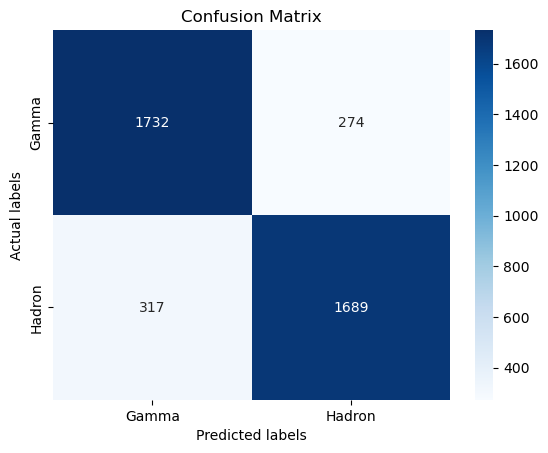

In [108]:
cf_matrix = confusion_matrix(y_test, y_pred.detach().numpy())
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);